**Assignment 4 - Customer Segmentation Analysis**

**Importing Libraries**


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**2. Load the dataset into the tool**

In [ ]:
data = pd.read_csv('Mall_Customers.csv')
# getting the shape
data.shape

(200, 5)

In [ ]:
# looking at the head of the data

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**3.Perform Below Visualizatons**


**3.1 Univariate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53566cc850>,
      dtype=object)

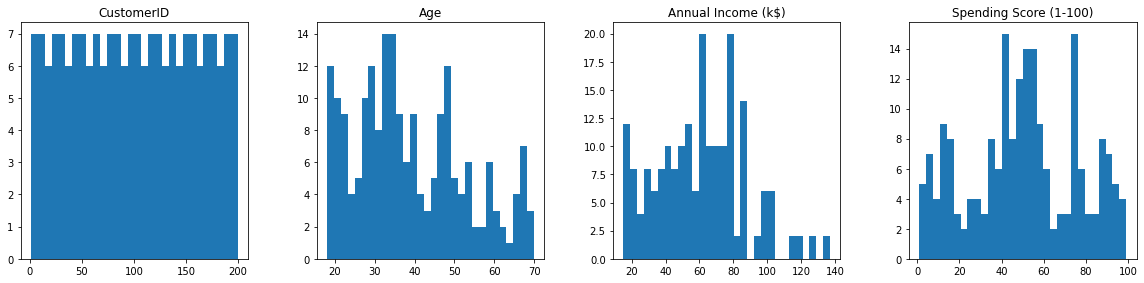

In [ ]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

**3.2 Bi-variate Analysis**

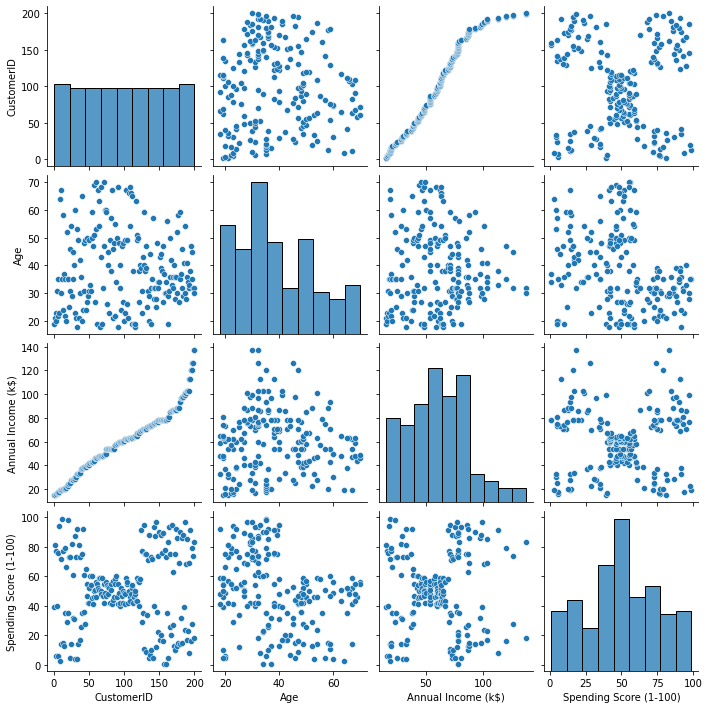

In [ ]:
sns.pairplot(data)

**3.3 Multi-Variate Analysis**

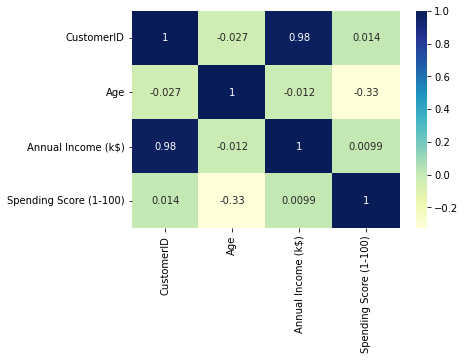

In [ ]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

**4.Perform descriptive statistics on the dataset.**


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**5.Check for Missing values and deal with them.**

In [ ]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

**9. Perform any of the clustering algorithms**

**10. Add the cluster data with the primary dataset**

**K-Means Clustering**

k-means clustering based on annual income

Elbow method to find the optimal number of Clusters

In [ ]:
x = data.iloc[:, [3, 4]].values
x.shape

(200, 2)

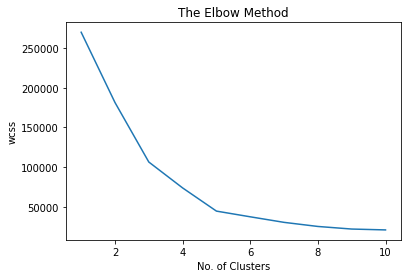

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

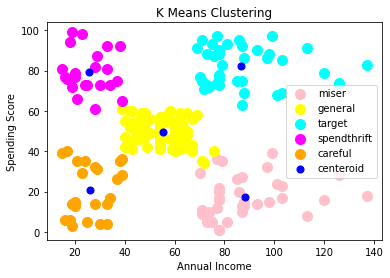

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'orange', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'prink', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'green', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

k-means clustering based on age



In [ ]:
x = data.iloc[:, [2, 4]].values
x.shape

(200, 2)

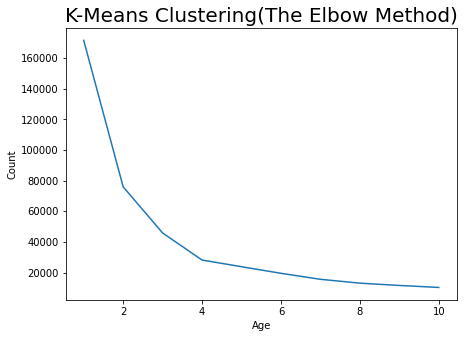

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

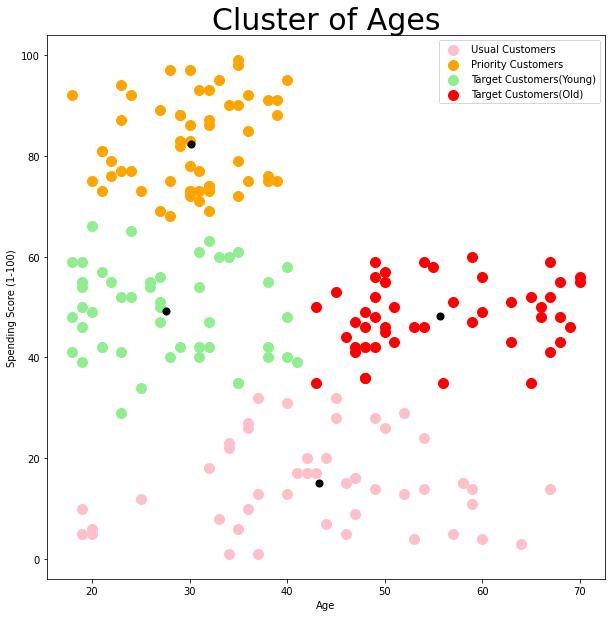

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'orange', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'yellow', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'pink', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

From cluster plot we can clearly see that males and females are in all the catgory that is high low and medium spending score category

In [ ]:
data['Gender'].replace(['Male', 'Female'], [0, 1], inplace = True)
data['Gender'].value_counts()

1    112
0     88
Name: Gender, dtype: int64

In [ ]:
x = data.iloc[:, [1, 4]].values
x.shape

(200, 2)

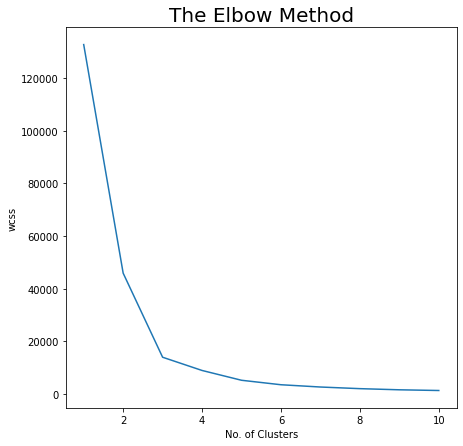

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  
plt.rcParams['figure.figsize'] = (7, 7)
plt.title('The Elbow Method', fontsize = 20)
plt.plot(range(1, 11), wcss)
plt.xlabel('No. of Clusters', fontsize = 10)
plt.ylabel('wcss')
plt.show()

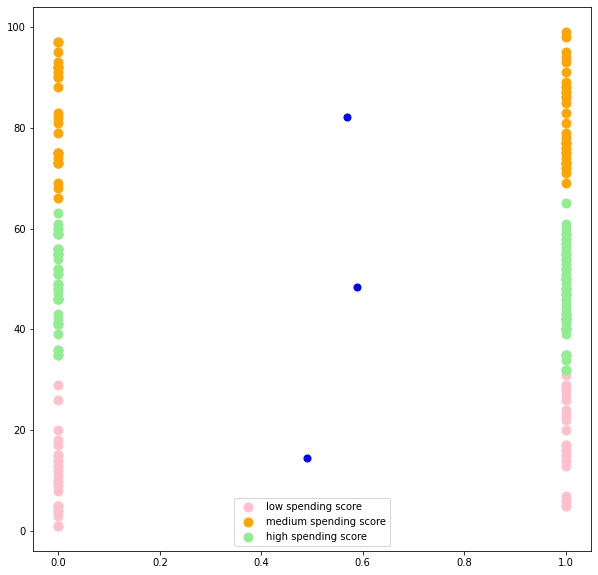

In [ ]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 80, c = 'pink', label = 'low spending score')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 80, c = 'orange', label = 'medium spending score')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 80, c = 'lightgreen', label = 'high spending score')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, color = 'blue')
plt.legend()
plt.show()

**6.Find the outliers and replace them outliers**

In [ ]:
data['Spending Score (1-100)']=np.where(data['Spending Score (1-100)']>10,np.median,data['Spending Score (1-100)'])
data['Spending Score (1-100)']

0      <function median at 0x7f5371977cb0>
1      <function median at 0x7f5371977cb0>
2                                        6
3      <function median at 0x7f5371977cb0>
4      <function median at 0x7f5371977cb0>
                      ...                 
195    <function median at 0x7f5371977cb0>
196    <function median at 0x7f5371977cb0>
197    <function median at 0x7f5371977cb0>
198    <function median at 0x7f5371977cb0>
199    <function median at 0x7f5371977cb0>
Name: Spending Score (1-100), Length: 200, dtype: object

**7.Check for Categorical columns and perform encoding.**

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() 
data['CustomerID'] = encoder.fit_transform(data['CustomerID'])

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,Male,19,15,<function median at 0x7f5371977cb0>
1,1,Male,21,15,<function median at 0x7f5371977cb0>
2,2,Female,20,16,6
3,3,Female,23,16,<function median at 0x7f5371977cb0>
4,4,Female,31,17,<function median at 0x7f5371977cb0>


**8.Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
df=StandardScaler()
data1=df.fit_transform(data)
print(data1)

[[-1.7234121  -1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.70609137 -1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-1.68877065  0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-1.67144992  0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-1.6541292   0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [-1.63680847  0.88640526 -1.20926872 -1.66266033  1.00159627]
 [-1.61948775  0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [-1.60216702  0.88640526 -1.13750203 -1.62449091  1.70038436]
 [-1.5848463  -1.12815215  1.80493225 -1.58632148 -1.83237767]
 [-1.56752558  0.88640526 -0.6351352  -1.58632148  0.84631002]
 [-1.55020485 -1.12815215  2.02023231 -1.58632148 -1.4053405 ]
 [-1.53288413  0.88640526 -0.27630176 -1.58632148  1.89449216]
 [-1.5155634   0.88640526  1.37433211 -1.54815205 -1.36651894]
 [-1.49824268  0.88640526 -1.06573534 -1.54815205  1.04041783]
 [-1.48092195 -1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [-1.46360123 -1.12815215 -1.20926872 -1.54815205  1.11

**11. Split the data into dependent and independent
variables.**


11.1 Split the data in to Independent variables.

In [ ]:
X = data.iloc[:, [3, 4]].values
X.shape

print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

11.2 Split the data in to Dependent variables.

In [ ]:
y=data.iloc[:,-2].values
print(y)

[ 15  15  16  16  17  17  18  18  19  19  19  19  20  20  20  20  21  21
  23  23  24  24  25  25  28  28  28  28  29  29  30  30  33  33  33  33
  34  34  37  37  38  38  39  39  39  39  40  40  40  40  42  42  43  43
  43  43  44  44  46  46  46  46  47  47  48  48  48  48  48  48  49  49
  50  50  54  54  54  54  54  54  54  54  54  54  54  54  57  57  58  58
  59  59  60  60  60  60  60  60  61  61  62  62  62  62  62  62  63  63
  63  63  63  63  64  64  65  65  65  65  67  67  67  67  69  69  70  70
  71  71  71  71  71  71  72  72  73  73  73  73  74  74  75  75  76  76
  77  77  77  77  78  78  78  78  78  78  78  78  78  78  78  78  79  79
  81  81  85  85  86  86  87  87  87  87  87  87  88  88  88  88  93  93
  97  97  98  98  99  99 101 101 103 103 103 103 113 113 120 120 126 126
 137 137]


**12.Split the data into training and testing**

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", X_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (160, 2)
Shape of x_test : (40, 2)
Shape of y_train : (160,)
Shape of y_test : (40,)


**13.Build the model**

In [ ]:
test_size=0.33
seed=7
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=seed)

**14.Train the Model**

In [ ]:
print(X_train)

[[ 98  15]
 [ 42  60]
 [ 99  39]
 [ 75   5]
 [ 54  41]
 [ 65  50]
 [ 60  52]
 [ 34  73]
 [ 72  34]
 [ 62  59]
 [ 61  42]
 [ 40  42]
 [ 17  76]
 [ 21  66]
 [ 78   1]
 [ 87  27]
 [137  83]
 [120  16]
 [ 47  52]
 [ 48  51]
 [ 28  32]
 [ 78  22]
 [ 38  92]
 [ 43  54]
 [ 93  90]
 [ 54  55]
 [ 18  94]
 [ 59  41]
 [ 87  92]
 [ 78  17]
 [ 49  55]
 [ 86  20]
 [ 63  54]
 [ 19   3]
 [ 62  56]
 [ 54  42]
 [ 70  77]
 [ 85  26]
 [ 29  87]
 [ 16  77]
 [ 37  75]
 [ 42  52]
 [ 54  48]
 [ 81  93]
 [ 65  48]
 [ 43  45]
 [ 59  55]
 [ 81   5]
 [ 39  61]
 [ 78  73]
 [ 40  42]
 [ 87  13]
 [ 46  46]
 [ 20  79]
 [ 43  60]
 [ 24  35]
 [ 20  13]
 [101  68]
 [ 72  71]
 [ 54  53]
 [ 19  72]
 [ 62  42]
 [ 63  46]
 [ 78  78]
 [ 20  15]
 [ 21  35]
 [ 40  47]
 [ 77  74]
 [ 67  57]
 [ 24  73]
 [ 79  83]
 [ 71   9]
 [ 97  86]
 [ 50  56]
 [ 30   4]
 [ 77  36]
 [ 33  92]
 [ 77  97]
 [ 85  75]
 [ 88  13]
 [ 69  91]
 [137  18]
 [ 62  41]
 [ 78   1]
 [ 97  32]
 [ 46  55]
 [ 33  81]
 [ 19  14]
 [103  23]
 [ 49  42]
 [113  91]

In [ ]:
print(y_train)

[ 98  42  99  75  54  65  60  34  72  62  61  40  17  21  78  87 137 120
  47  48  28  78  38  43  93  54  18  59  87  78  49  86  63  19  62  54
  70  85  29  16  37  42  54  81  65  43  59  81  39  78  40  87  46  20
  43  24  20 101  72  54  19  62  63  78  20  21  40  77  67  24  79  71
  97  50  30  77  33  77  85  88  69 137  62  78  97  46  33  19 103  49
 113  60  67  77  15  54 103  57  73  17  37  87  33  64  78  44  48  39
  23  18  43  54  15  87  73  71  88  48  86  73  39  63  58  50  25  76
  99  60  62  78  48  28 126  88]


**15.Test the Model**

In [ ]:
print(X_test)

[[ 57  58]
 [ 67  56]
 [ 25   5]
 [ 19  99]
 [120  79]
 [ 16   6]
 [ 67  40]
 [ 60  42]
 [ 48  50]
 [ 47  59]
 [ 63  43]
 [ 60  47]
 [ 74  10]
 [ 48  59]
 [103  17]
 [ 78  89]
 [ 28  14]
 [ 61  49]
 [ 78  76]
 [ 40  55]
 [ 93  14]
 [ 74  72]
 [ 76  87]
 [ 54  47]
 [101  24]
 [ 87  63]
 [ 62  48]
 [126  74]
 [ 63  48]
 [ 88  69]
 [ 44  46]
 [ 63  50]
 [ 79  35]
 [ 54  57]
 [ 70  29]
 [ 54  46]
 [ 71  35]
 [ 98  88]
 [ 54  51]
 [ 65  43]
 [ 71  75]
 [ 71  11]
 [ 46  56]
 [ 69  58]
 [ 28  61]
 [ 38  35]
 [ 39  65]
 [103  69]
 [ 30  73]
 [ 78  16]
 [ 33   4]
 [ 20  77]
 [ 65  59]
 [ 54  52]
 [ 71  75]
 [ 29  31]
 [ 23  29]
 [ 75  93]
 [ 73   5]
 [ 60  50]
 [ 58  60]
 [ 46  51]
 [ 64  46]
 [ 78  90]
 [ 34  17]
 [113   8]]


In [ ]:
print(y_test)

[ 57  67  25  19 120  16  67  60  48  47  63  60  74  48 103  78  28  61
  78  40  93  74  76  54 101  87  62 126  63  88  44  63  79  54  70  54
  71  98  54  65  71  71  46  69  28  38  39 103  30  78  33  20  65  54
  71  29  23  75  73  60  58  46  64  78  34 113]


**16.Measure the performance using metrics**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
X_train=[5,-1,2,10]
Y_test=[3.5,-0.9,2,9.9]
print('RSquared=',r2_score(X_train,Y_test))
print('MAE=',mean_absolute_error(X_train,Y_test))
print('MSE=',mean_squared_error(X_train,Y_test))

RSquared= 0.9656060606060606
MAE= 0.42499999999999993
MSE= 0.5674999999999999
